In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_csv(f'../../../code-mixed-enma/dc_fire/malayalam_train.tsv', sep='\t')
df_train.head()

,text,category
0,hoo mammokka police vesham aaha anthas,Positive
1,Oru rekshayum illa...kidilam kannu nananjupoyi,Positive
2,Ikka waiting.........,Positive
3,Raju Ettante Oro Shorttum Ijathi ppwli,Positive
4,Ettan fansil netti poya aarenkilum undo? #...,Positive


In [3]:
df_train.shape

(4851, 2)

In [4]:
df_dev = pd.read_csv(f'../../../code-mixed-enma/dc_fire/malayalam_dev.tsv', sep='\t')
df_dev.head()

,text,category
0,speechless 🤐. ikkaaa,not-malayalam
1,Raja sollunathu mattuthaam seyyvaa seyyunnath...,not-malayalam
2,Im Prithiviraj fan from tamilnadu... Love it,not-malayalam
3,mohanlal sir - look ..... kiddo...,Positive
4,Kandathil vech mungiya pdam Rating 1.1/5,Negative


In [5]:
df_dev.shape

(540, 2)

In [6]:
df_test = pd.read_csv(f'../../../code-mixed-enma/dc_fire/malayalam_test.tsv', sep='\t')
df_test.head()

,id,text
0,ml_sen_1,Bollywood film Newton inte remake aano?
1,ml_sen_2,endukond viewrs koodunnilla ?? ippozhum 2.8m a...
2,ml_sen_3,Mara paazhu mega mairananil ninnum ethil koodu...
3,ml_sen_4,Video nay cang xem cang thit
4,ml_sen_5,Sunny chechiye kaanan vannathu njan maathram aano


In [7]:
df_test.shape

(1348, 2)

In [8]:
import unicodedata as ud

latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha()) # isalpha suggested by John Machin

In [10]:
count = 0
for index, row in df_train.iterrows():
    if not only_roman_chars(row['text']):
        print(index, row['text'], row['category'])
        print('\n\n')
        count += 1
print(1 - count/len(df_train))

65  من متى أعرفك اصلا حتى انساك not-malayalam 



126  Tovino ishtam Tovino fans like adi ആൻഡ് സപ്പോർട്ട് me unknown_state 



134  Ithoru onnonnara ITEM avumenn urappullavar LIKE ADI ലാലേട്ടൻ Positive 



148  Dislike adechath alla punnara makkalum anta veral നമസ്കാരം Negative 



271  Eee oru movie കൊണ്ട്‌ mohanlal fan aakumennu തോനുന്നു katta waiting Positive 



290  Njan mathram ano padam kand വന്നു veendum trailer edth noki veendum padam kanan poyathangane പോയവര്‍ അടി like unknown_state 



294  Pwlichu........... Ikkka pwlichu  മാസ്സ് പടം.. ... Hollywood cut.. Positive 



413  Dislike അടിച്ചു കുരു pottikkunnavarkk kurupottalaathi kodukkapedum    തള്ള് മൂപ്പൻ Negative 



415  I am കട്ട  waiting for ഒടിയൻ Positive 



446  Poojapura mohanan fans moonchi. ഇക്ക പൊളി Negative 



494  Adutha masterpiece aavum mammookkayude  പ്രിത്വി unknown_state 



535  That “വാടാ “ vili   ettan unknown_state 



666  Dislike alla lappantta makkalum anta nadu veral നമസ്കാരം Negative 



672  FDFS

4836  പഠിച്ച കള്ളനാ... Like അടി മക്കളെ... Frst time views kandarvar alem like or dislike. Like and viws same same.. unknown_state 



0.9775304061018347


In [12]:
count = 0
for index, row in df_dev.iterrows():
    if not only_roman_chars(row['text']):
        print(index, row['text'], row['category'])
        print('\n\n')
        count += 1
print(1 - count/len(df_dev))

104  Padam clss ann വേറെ level ayirikum Positive 



112  Tovinho fans like അടി..... tovinho പൊളിച്ചു Positive 



178  Ee Padam തീയറ്റർ il poyi kanum ennu ullavar undo ivide   Like unknown_state 



235  ഇത് film ആണോ real ആണോ  Mammukka pwoli Positive 



331  #trnding 1 എന്ന് കണ്ടു സന്തോഷായി   From an ikka fan  Rajuettn lalleettn  Adarru combo Positive 



333  ഇതു തൃശൂർ slng pole.. enikk mathramanoo thonniyadh....? unknown_state 



346  Trailer കാണാൻ വേണ്ടി urakathe kathe ninvar ലൈക്‌ adi unknown_state 



357  Ijjadi mass sadanam ഇക്ക നിങ്ങ poliyaan inippo kurupottichond കൊറേ mairanmar വരും Negative 



395  Last BGM polichuuuuu. പക്ഷേ ഈ വിഷു ikkade കൈയില്‍ ആണ്‌. Ikkadaaaaaaaa Mixed_feelings 



405  ഇവിടെ telug padangal vevoola mr Twolinjo.. Negative 



409  I love മലയാളം-ಮಲಯಾಳಂ- Malayalam movies. Love from ಕರ್ನಾಟಕ-കർനാടക-Karnataka unknown_state 



453  Promising trailer... Lalettaaaa rajiettaaaaa പൊളിച്ചടുക്കി Positive 



459  Only 192k views... (11 pm) പക്ഷെ 190k like... 19k 

In [14]:
count = 0
for index, row in df_test.iterrows():
    if not only_roman_chars(row['text']):
        print(index, row['text'])
        print('\n\n')
        count += 1
print(1 - count/len(df_test))

31 അടിപൊളി 120 k aayii...   Bot Bot



54 Idakk  എവിടെയോ sonam kapoor nte chaya



89 ഇത് വേറെ level annallo machanmare...



122 ഇത് trending ആകും എന്ന് urapullavar like adikki



136 మమ్మూటీ చాలా అందంగా ఉంది మరియు అతను మరిన్ని చర్యలు చేశాడు



151 ഡോഗ് trainer.  Saajan Saji Cyriac.



154 എജ്ജാതി frames കിടു trailer Rajuvetta brilliant direction!!



168 തീപ്പൊരി waiting ah  raja  mammookka



185 Kasaba+ idi+ siruthai  കണ്ട പോലെ !!



251 Onnum parayanilla... ഒരു pidiyum kittunnilla... waiting for.... pathinettam പടി..... Rockkk Mammookka .



278 രാജ  trailer first കണ്ടവർ like.



338 സണ്ണി chechy fanz adich polikk...



364 Kochu pillara vechu erakiya padam എന്നു paryathe illa



369 Mammooty fans എന്റെ ചാനൽ sandarschikkuka



418 1:48 illl dileepettante.... Lookkum.... അഭിനയവും......



424 Best wishes from a ചെകുത്താന്റെ fan..



525 മമ്മൂക്ക Birthday  Ethrem neram nokki ninnu.



541 ഇത് pirats ഓഫ് caribian annu bri



599 ഈശ്വര Comment idaan onnum kittinilallo FULL രോമാഞ്ചം




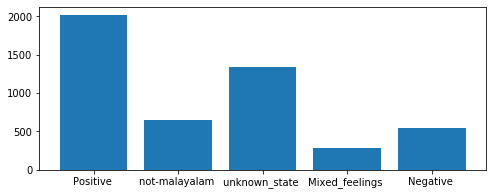

In [15]:
# Class distribution in training set
D = Counter(df_train['category'])
plt.rcParams["figure.figsize"] = (8,3)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [16]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  289
Max no. of sentences:  2022
Avg no. of sentences:  970.2
Median of sentences:  647


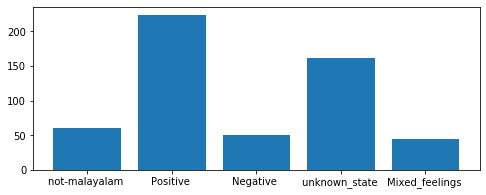

In [17]:
# Class distribution in dev set
D = Counter(df_dev['category'])
plt.rcParams["figure.figsize"] = (8,3)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [18]:
# Min, Max, Avg no of sentences per class in Dev set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  44
Max no. of sentences:  224
Avg no. of sentences:  108
Median of sentences:  60


In [19]:
def tokenize(s: str):
    return s.split()

In [20]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tokenize((row['text']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  24
Avg no. of tokens:  8.120593692022263
Median of no. of tokens:  7


In [21]:
# variation in length of sentences in dev set
len_of_tokens = []
for index, row in df_dev.iterrows():
    tokens = tokenize((row['text']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  19
Avg no. of tokens:  8.177777777777777
Median of no. of tokens:  7.0


In [22]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tokenize((row['text']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  23
Avg no. of tokens:  8.136498516320474
Median of no. of tokens:  7.0
